In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator

import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator

% matplotlib notebook

In [2]:
def plot_style(xticks=5,yticks=5,a=8,b=7.5):
    
    global ax
    
    plt.rc('text', usetex=True)
    #plt.rcParams['mathtext.fontset'] = 'cm'
    #plt.rcParams['mathtext.rm'] = 'serif'
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['figure.figsize'] = a, b

    fig,ax = plt.subplots()
    x_minor_locator = AutoMinorLocator(xticks)
    y_minor_locator = AutoMinorLocator(yticks)
    plt.tick_params(which='both', width=1.7)
    plt.tick_params(which='major', length=9)
    plt.tick_params(which='minor', length=5)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)
    ax.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

    plt.rcParams['lines.linewidth'] = 1.0
    plt.rcParams['lines.dashed_pattern'] = [6, 6] 
    plt.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
    plt.rcParams['lines.dotted_pattern'] = [1, 3]
    plt.rcParams['lines.scale_dashes'] = False
    plt.rcParams['errorbar.capsize'] = 6
    
def fixlogax(ax, a='x'):
    if a == 'x':
        labels = [item.get_text() for item in ax.get_xticklabels()]
        positions = ax.get_xticks()
        # print positions
        # print labels
        for i in range(len(positions)):
            labels[i] = '$10^{'+str(int(np.log10(positions[i])))+'}$'
        if np.size(np.where(positions == 1)) > 0:
            labels[np.where(positions == 1)[0][0]] = '$1$'
        if np.size(np.where(positions == 10)) > 0:
            labels[np.where(positions == 10)[0][0]] = '$10$'
        if np.size(np.where(positions == 0.1)) > 0:
            labels[np.where(positions == 0.1)[0][0]] = '$0.1$'
        # print positions
        # print labels
        ax.set_xticklabels(labels)
    if a == 'y':
        labels = [item.get_text() for item in ax.get_yticklabels()]
        positions = ax.get_yticks()
        # print positions
        # print labels
        for i in range(len(positions)):
            labels[i] = '$10^{'+str(int(np.log10(positions[i])))+'}$'
        if np.size(np.where(positions == 1)) > 0:
            labels[np.where(positions == 1)[0][0]] = '$1$'
        if np.size(np.where(positions == 10)) > 0:
            labels[np.where(positions == 10)[0][0]] = '$10$'
        if np.size(np.where(positions == 0.1)) > 0:
            labels[np.where(positions == 0.1)[0][0]] = '$0.1$'
        # print positions
        # print labels
        ax.set_yticklabels(labels)

In [3]:
def exp_fit(x,b,tau,c):
    return c+b*np.exp(-x/tau)

In [4]:
data1 = np.loadtxt('relaxation_curves.dat')
x = data1[:,0]

In [5]:
t1= np.random.randint(low=365*0.7,high=365*2,size=1000)

left_NO = np.array([0.5,0.5,0.5,0.8,2,3,3])
right_NO = np.array([2,2,2,3,8,9,9])

left_SF = np.array([0.5,0.5,0.5,0.8,2,3,3])
right_SF = np.array([2,2,2,3,5,6,6])

t_0_1_2 = np.random.randint(low=365*left_NO[0],high=365*right_NO[0],size=1000)
t_3 = np.random.randint(low=365*left_NO[3],high=365*right_NO[3],size=1000)
t_4 = np.random.randint(low=365*left_NO[4],high=365*right_NO[4],size=1000)
t_5_6 = np.random.randint(low=365*left_NO[5],high=365*right_NO[5],size=1000)

t_SF_0_1_2 = np.random.randint(low=365*left_SF[0],high=365*right_SF[0],size=1000)
t_SF_3 = np.random.randint(low=365*left_SF[3],high=365*right_SF[3],size=1000)
t_SF_4 = np.random.randint(low=365*left_SF[4],high=365*right_SF[4],size=1000)
t_SF_5_6 = np.random.randint(low=365*left_SF[5],high=365*right_SF[5],size=1000)

t_all = np.zeros((1000,14))

t_all[:,1] = t_0_1_2
t_all[:,3] = t_0_1_2
t_all[:,5] = t_0_1_2
t_all[:,7] = t_3
t_all[:,9] = t_4
t_all[:,11] = t_5_6
t_all[:,13] = t_5_6

t_all[:,0] = t_SF_0_1_2
t_all[:,2] = t_SF_0_1_2
t_all[:,4] = t_SF_0_1_2
t_all[:,6] = t_SF_3
t_all[:,8] = t_SF_4
t_all[:,10] = t_SF_5_6
t_all[:,12] = t_SF_5_6

num_end_NO_arr = np.array([20, 20, 20, 20, 25, 30, 30])

num_arg1_NO_5_6 = np.argmin(np.abs(data1[:,0]-365*num_end_NO_arr[-1]))
num_arg1_NO_4 = np.argmin(np.abs(data1[:,0]-365*num_end_NO_arr[-3]))
num_arg1_NO = np.argmin(np.abs(data1[:,0]-365*num_end_NO_arr[0]))

num_arg1_SF = np.argmin(np.abs(data1[:,0]-365*15))

num_arg1 = np.vstack([num_arg1_SF,num_arg1_NO,num_arg1_SF,num_arg1_NO,num_arg1_SF,num_arg1_NO,
                      num_arg1_SF,num_arg1_NO,num_arg1_SF,num_arg1_NO_4,num_arg1_SF,num_arg1_NO_5_6,
                      num_arg1_SF,num_arg1_NO_5_6])

print(np.shape(num_arg1))
popt_n = np.zeros((3,14,len(t1)))
cov_n = np.zeros((3,3,14,len(t1)))

cov1 = np.zeros([3,3,14])
cov1_2 = np.zeros([3,3,14])
popt1 = np.zeros([3,14])

for i,num_arg_end in zip(range(1,15),num_arg1[:,0]):
    for k in range(len(t1)):
        num_arg = np.argmin(np.abs(data1[:,0]-t_all[k,i-1]))
        popt_n[:,i-1,k], cov_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg_end], data1[num_arg:num_arg_end,i],p0=[50,365,110])
        
    popt1[0,i-1] = np.mean(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt1[1,i-1] = np.mean(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt1[2,i-1] = np.mean(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    
    cov1[0,0,i-1] = np.var(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov1[1,1,i-1] = np.var(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov1[2,2,i-1] = np.var(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    
    cov1_2[0,0,i-1] = np.mean(cov_n[0,0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov1_2[1,1,i-1] = np.mean(cov_n[1,1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov1_2[2,2,i-1] = np.mean(cov_n[2,2,i-1,:][np.where(popt_n[1,i-1,:]>150)])

    
print(popt1[0,:])
print(cov1[0,0,:])
print(cov1_2[0,0,:])
print('---------')

print(popt1[1,:])
print(cov1[1,1,:])
print(cov1_2[1,1,:])
print('---------')

print(popt1[2,:])
print(cov1[2,2,:])
print(cov1_2[2,2,:])
print('---------')

(14, 1)


/home/maryhallow/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


[  5.04166403   4.03928261   8.17523356   6.48879828  11.73614874
   9.13736848  14.85010828   7.65642711  35.6842388    7.75233319
  80.87709253  14.72757853  94.84224479  17.12193632]
[   0.31712383    1.7355379     0.7571262     4.93571307    0.99488847
    8.68714613    0.1901123     8.10422457    2.10233754    1.89077907
   50.05027782    0.64669673  146.13341653    0.29435739]
[  1.26244406e-04   9.81675365e-04   3.01369952e-04   2.49171073e-03
   4.02140364e-04   4.52934039e-03   6.07846694e-05   3.16442249e-03
   5.11338070e-04   4.13360048e-04   1.55037785e-02   1.57071451e-04
   4.44449457e-02   7.60668931e-05]
---------
[  574.53684491   645.44636921   576.4071276    618.02528798   586.57955399
   615.16944115   623.54481367   891.96938182   644.67504821  1817.3112165
   656.72630523  2089.9259221    670.47215726  2157.20812368]
[  1807.20997588  28270.98806612   1670.84503963  22335.00511732
   1162.56607399  19635.83577438    133.84426929  51285.99436376
    144.74107173  

<IPython.core.display.Javascript object>


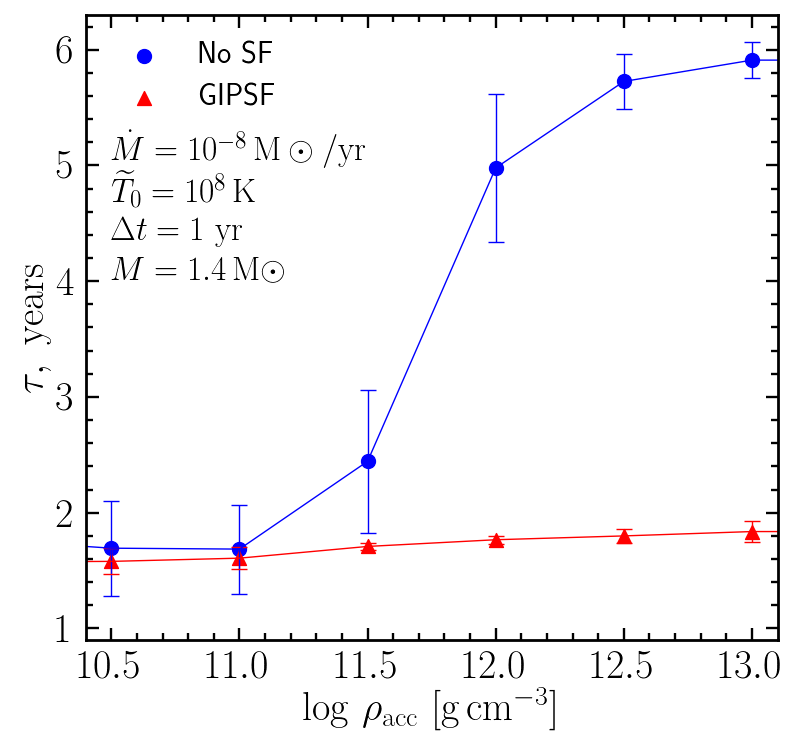

In [7]:
plot_style()
rho_array = [10,10.5,11,11.5,12,12.5,13]

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=29)
plt.ylabel('$\\tau, \\thinspace  \\thinspace  \\rm years$',fontsize=29)

rho_array = np.append(rho_array,14)
t_array_NO = np.append(popt1[1,1::2],popt1[1,1::2][-1])/365
t_array_SF = np.append(popt1[1,::2],popt1[1,::2][-1])/365

error_NO = np.sqrt(np.append(cov1[1,1,1::2],cov1[1,1,1::2][-1]))/365
error_SF = np.sqrt(np.append(cov1[1,1,::2],cov1[1,1,::2][-1]))/365

plt.errorbar(rho_array , t_array_SF, yerr=error_SF,color='red')
plt.errorbar(rho_array , t_array_NO, yerr=error_NO,color='blue')

plt.xticks([10,10.5,11,11.5,12,12.5,13],fontsize=29)
plt.yticks([1,2,3,4,5,6],fontsize=29)
plt.xlim(10.4,13.1)
plt.scatter(rho_array,t_array_NO,s=100,color='b',label='No SF')
plt.scatter(rho_array,t_array_SF,s=100,marker='^',color='r',label='GIPSF')

plt.text(10.50,5.05,'$\dot{M} = 10^{-8} \\thinspace \\rm M \\odot / yr$',fontsize=24)
plt.text(10.50,4.63,'$\widetilde{T}_{0} = 10^{8} \\thinspace \\rm K$',fontsize=24)
plt.text(10.50,4.35,'$\Delta t = 1 \\thinspace \\thinspace \\rm yr$',fontsize=24)
plt.text(10.50,4.01,'$M = 1.4 \\thinspace \\rm M \odot$',fontsize=24)
       
plt.xlim(10.4,13.1)
plt.ylim(0.9,6.3)

plt.legend(loc='upper left',fontsize=22,frameon=False)
plt.savefig('fig_new.eps',format='eps')

<IPython.core.display.Javascript object>


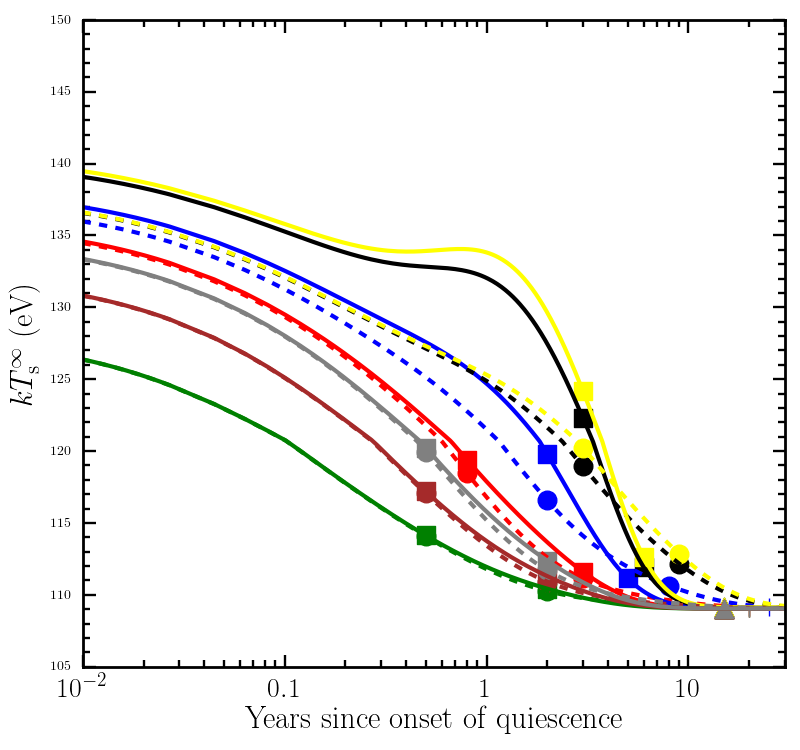

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [8]:
def plot5(): 
    
    plot_style()
    k_b = 8.617330350e-5
    config = np.loadtxt('data/config.dat')
        
    for num,cl in zip([3,4,5,6,0,1,2],['red','blue','black','yellow','green','brown','grey']):
 
        data1 = np.loadtxt('output/cooling_GIPSF_' + str(num+28) + '.dat')[::15,:]
        data2 = np.loadtxt('output/cooling_SF0_' + str(num+28) + '.dat')[::15,:]
        
        value_SF_left = np.interp(left_SF[num],data1[1:, 1]-1.001000e3,data1[1:, 0]*k_b)
        value_SF_right = np.interp(right_SF[num],data1[1:, 1]-1.001000e3,data1[1:, 0]*k_b)
        value_NO_left = np.interp(left_NO[num],data2[1:, 1]-1.001000e3,data2[1:, 0]*k_b)
        value_NO_right = np.interp(right_NO[num],data2[1:, 1]-1.001000e3,data2[1:, 0]*k_b)
        
        value_SF_end = np.interp(15,data1[1:, 1]-1.001000e3,data1[1:, 0]*k_b)
        value_NO_end = np.interp(num_end_NO_arr[num],data2[1:, 1]-1.001000e3,data2[1:, 0]*k_b)
        
        plt.plot(data1[1:, 1]-1.001000e3, data1[1:, 0]*k_b,'-',color=cl,
             linewidth='3')
        plt.plot(data2[1:, 1]-1.001000e3, data2[1:, 0]*k_b, '--',color=cl,
             linewidth='3')
        plt.scatter([left_SF[num],right_SF[num]],[value_SF_left ,value_SF_right],color=cl,s=180,marker='s')
        plt.scatter([left_NO[num],right_NO[num]],[value_NO_left ,value_NO_right],color=cl,s=180)
        
        plt.scatter(15, value_SF_end,color=cl,s=180,marker='^')
        plt.scatter(num_end_NO_arr[num], value_NO_end,color=cl,s=180,marker='+')
        
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=20)

    plt.xlabel('$\\rm Years \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    fixlogax(plt.gca(), a='x')
    plt.xlim(0.01,30.1)
    plt.ylim(105,150)
    plt.show()

plot5()

<IPython.core.display.Javascript object>


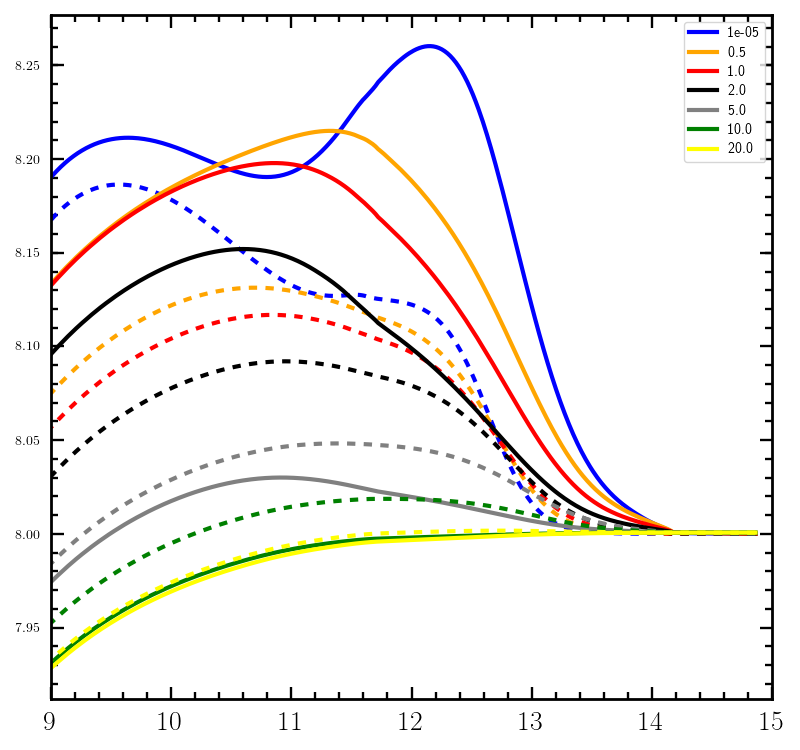

In [9]:
turn_on_time = 0

t_points_save_data  = np.array([turn_on_time + 0.00001, turn_on_time + 0.01, turn_on_time + 0.1, turn_on_time + 0.5, turn_on_time + 1., turn_on_time + 1.5,
                                       turn_on_time + 2.,   turn_on_time + 2.5,  turn_on_time + 3,  turn_on_time + 3.5, turn_on_time + 4., turn_on_time + 4.5, turn_on_time + 5,
                                       turn_on_time + 6, turn_on_time + 7, turn_on_time + 8, turn_on_time + 9, turn_on_time + 10, turn_on_time + 11,
                                       turn_on_time + 12, turn_on_time + 13, turn_on_time + 14, turn_on_time + 15, turn_on_time + 16, turn_on_time + 17,
                                       turn_on_time + 18, turn_on_time + 19, turn_on_time + 20, turn_on_time + 21, turn_on_time + 22, turn_on_time + 23,
                                       turn_on_time + 24, turn_on_time + 25, turn_on_time + 26, turn_on_time + 27, turn_on_time + 28, turn_on_time + 29])

def plot7(): 
    
    plot_style()
    k_b = 8.617330350e-5

    num = 6
    data1 = np.loadtxt('output/temperature_GIPSF_' + str(num+28) + '.dat')
    data2 = np.loadtxt('output/temperature_SF0_' + str(num+28) + '.dat')
        
    
    for i,col in zip([1,4,5,7,13,18,28],['blue','orange','red','black','gray','green','yellow','darkred','brown','darkblue']):

        plt.plot(np.log10(data1[:,0]),np.log10(data1[:,i]),'-',color=col,lw=3,label=str(t_points_save_data[i-1]))
        plt.plot(np.log10(data2[:,0]),np.log10(data2[:,i]),'--',color=col,lw=3)

    plt.xticks([9,10,11,12,13,14,15], fontsize=20)

    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    plt.xlim(9,15)
    plt.legend(loc='upper right')
    plt.show()

plot7()

In [5]:
data3 = np.loadtxt('IGR.dat')

t1= np.random.randint(low=365*0.7,high=365*2,size=1000)

x = data3[:,0]

left_NO3 = np.array([0.2,0.2,0.2,0.2,0.7,0.8,0.8])
right_NO3 = np.array([1.,1.,1.,1.5,2.,3.,3.])

left_SF3 = np.array([0.2,0.2,0.2,0.2,0.9,1,1])
right_SF3 = np.array([1.,1.,1.,1.5,2.,2.,2.])

t_0_1_2 = np.random.randint(low=365*left_NO3[0],high=365*right_NO3[0],size=1000)
t_3 = np.random.randint(low=365*left_NO3[3],high=365*right_NO3[3],size=1000)
t_4 = np.random.randint(low=365*left_NO3[4],high=365*right_NO3[4],size=1000)
t_5_6 = np.random.randint(low=365*left_NO3[5],high=365*right_NO3[5],size=1000)

t_SF_0_1_2 = np.random.randint(low=365*left_SF3[0],high=365*right_SF3[0],size=1000)
t_SF_3 = np.random.randint(low=365*left_SF3[3],high=365*right_SF3[3],size=1000)
t_SF_4 = np.random.randint(low=365*left_SF3[4],high=365*right_SF3[4],size=1000)
t_SF_5_6 = np.random.randint(low=365*left_SF3[5],high=365*right_SF3[5],size=1000)

t_all = np.zeros((1000,14))

t_all[:,1] = t_0_1_2
t_all[:,3] = t_0_1_2
t_all[:,5] = t_0_1_2
t_all[:,7] = t_3 
t_all[:,9] = t_4
t_all[:,11] = t_5_6
t_all[:,13] = t_5_6

t_all[:,0] = t_SF_0_1_2
t_all[:,2] = t_SF_0_1_2
t_all[:,4] = t_SF_0_1_2
t_all[:,6] = t_SF_3
t_all[:,8] = t_SF_4
t_all[:,10] = t_SF_5_6
t_all[:,12] = t_SF_5_6

num_arg3_NO = np.argmin(np.abs(data3[:,0]-365*10))
num_arg3_SF = np.argmin(np.abs(data3[:,0]-365*5))

num_arg3 = np.vstack([num_arg3_SF,num_arg3_NO,num_arg3_SF,num_arg3_NO,num_arg3_SF,num_arg3_NO,
                      num_arg3_SF,num_arg3_NO,num_arg3_SF,num_arg3_NO,num_arg3_SF,num_arg3_NO,
                      num_arg3_SF,num_arg3_NO])

popt_n = np.zeros((3,14,len(t1)))
cov_n = np.zeros((3,3,14,len(t1)))

cov3 = np.zeros([3,3,14])
cov3_2 = np.zeros([3,3,14])
popt3 = np.zeros([3,14])

for i,num_arg_end in zip(range(1,15),num_arg3[:,0]):
    for k in range(len(t1)):
        num_arg = np.argmin(np.abs(data3[:,0]-t_all[k,i-1]))
        popt_n[:,i-1,k], cov_n[:,:,i-1,k] = optimize.curve_fit(exp_fit, x[num_arg:num_arg_end], data3[num_arg:num_arg_end,i],p0=[20,365*0.5,84.3])
        
    popt3[0,i-1] = np.mean(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt3[1,i-1] = np.mean(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    popt3[2,i-1] = np.mean(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    
    cov3[0,0,i-1] = np.var(popt_n[0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3[1,1,i-1] = np.var(popt_n[1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3[2,2,i-1] = np.var(popt_n[2,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    
    cov3_2[0,0,i-1] = np.mean(cov_n[0,0,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3_2[1,1,i-1] = np.mean(cov_n[1,1,i-1,:][np.where(popt_n[1,i-1,:]>150)])
    cov3_2[2,2,i-1] = np.mean(cov_n[2,2,i-1,:][np.where(popt_n[1,i-1,:]>150)])

    
print(popt3[0,:])
print(cov3[0,0,:])
print(cov3_2[0,0,:])
print('---------')

print(popt3[1,:])
print(cov3[1,1,:])
print(cov3_2[1,1,:])
print('---------')

print(popt3[2,:])
print(cov3[2,2,:])
print(cov3_2[2,2,:])
print('---------')

/home/maryhallow/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/maryhallow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


[  4.56022079   3.82564663   6.91126244   5.98325162   9.08844893
   7.73134807  10.80444157   6.80564169  20.63958331   5.64052403
  37.02227516   7.50393104  41.99375917   8.30014231]
[  0.27236745   1.28733316   0.47001923   2.60955666   0.35963473
   3.51831805   0.05382063   7.00942724   1.06028845   1.8376541
   9.46707687   0.85280591  16.04499521   0.43292585]
[  1.47168641e-04   7.61075857e-04   2.55457843e-04   1.66619525e-03
   2.02637747e-04   2.54985634e-03   4.97901528e-05   2.36927373e-03
   6.27455611e-04   1.09628454e-03   7.05915096e-03   2.86141664e-04
   1.21548667e-02   1.49594587e-04]
---------
[ 209.96954283  233.19049122  212.88307008  225.48315424  218.87376818
  229.85229586  227.41824446  292.00163205  232.51747901  482.11099419
  239.91727539  624.02132434  242.8908949   650.4854388 ]
[  193.49015584  1705.57026311   156.13442769  1277.03260912    80.86928913
  1101.21043865    11.42118335  4602.36626189    18.38989243  4471.46361301
    54.77348878  2279.48

3.92443527425
0.0298114539081 None
1.31151159137
0.00492172169038 None
61.8516729551
3.37320778917 None
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


<IPython.core.display.Javascript object>


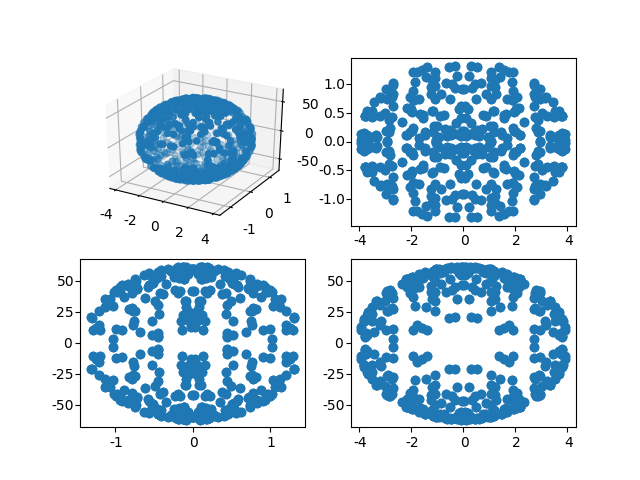

In [6]:
num_arg4 = np.argmin(np.abs(data3[:,0]-365*0.005))
num_arg5 = np.argmin(np.abs(data3[:,0]-365*29))
real_data = np.zeros([800,len(x[num_arg4:num_arg5][::2])])

a_m = 21.6
b_m = 84.3
tau_m = 157

delta_a = 4
delta_b = 1.4
delta_tau = 62
a = np.random.random(size=100)*delta_a
b = np.random.random(size=100)*delta_b*np.sqrt(1 - (a/delta_a)**2)
tau = delta_tau*np.sqrt(1  - (a/delta_a)**2  - (b/delta_b)**2)
print(np.min(a),print(np.max(a)))
print(np.min(b),print(np.max(b)))
print(np.min(tau),print(np.max(tau)))

print(a*a/delta_a/delta_a+b*b/delta_b/delta_b+tau*tau/delta_tau/delta_tau)
a = np.concatenate([  a, -a,  a,  a,     a,  -a,  -a,  -a  ])
b = np.concatenate([  b,  b, -b,  b,    -b,  -b,   b,  -b  ])
tau = np.concatenate([tau,tau,tau,-tau,-tau, tau, -tau,-tau])

fig = plt.figure()

ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(a,b,tau)
ax2 = fig.add_subplot(222)
ax2.scatter(a,b)
ax3 = fig.add_subplot(223)
ax3.scatter(b,tau)
ax4 = fig.add_subplot(224)
ax4.scatter(a,tau)

for i in range(800):
    real_data[i,:] = exp_fit(x[num_arg4:num_arg5][::2],a_m + a[i],tau_m + tau[i],b_m + b[i])
       
real_data_max = np.max(real_data,axis=0)
real_data_min = np.min(real_data,axis=0)
        

In [13]:
def f_IGR(x):
    return 84.3+21.6*np.exp(-x/157)

def plot2(): 
    plot_style()
    k_b = 8.617330350e-5
     
    #plt.fill_between(x[num_arg4:num_arg5][::2]/365,real_data_min,real_data_max,color='lightgray')
        
    for num,idx,lb in zip([6,4,2],[2,3,0],['\\huge $\\rho_{\\rm acc} = 10^{13} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
                                           '\\huge $\\rho_{\\rm acc} = 10^{12} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$',
    '\\huge $\\rho_{\\rm acc} = 10^{11} \\rm \\thinspace \\thinspace g \\thinspace cm^{-3}$']):
 
        data1 = np.loadtxt('output/cooling_GIPSF_' + str(num+35) + '.dat')
        data2 = np.loadtxt('output/cooling_SF0_' + str(num+35) + '.dat')

        plt.plot((data1[:, 1]-1.000200e3), data1[:, 0]*k_b, color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx],label=lb)
        plt.plot((data2[:, 1]-1.000200e3), data2[:, 0]*k_b, '--',color=colors2[idx],
             linewidth=line_thickness2[idx],zorder=order2[idx])
        
        
    plt.plot([10,10],[20,20],color='black',lw=5,label='GIPSF model')
    plt.plot([10,10],[20,20],dashes=[5,5],color='black',lw=5,label='No SF')
    
  
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=29)
    
    for i,lb,c in zip(range(9,11,1),['Best fit GIPSF','Best fit No SF'],['dodgerblue','orange']):
        print(*popt3[:,i-1])
        print(np.sqrt(np.diag(cov3[:,:,i-1])))
        plt.plot(x/365,exp_fit(x,*popt3[:,i-1]),dashes=[10,4,3,4],lw=3
                ,label=lb,zorder=5,color=c)

    plt.text(0.015, 84.0,'$\dot{M} = 5.7\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=24)
    #plt.text(0.015, 81.7,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=23)
    plt.text(0.015, 81.7,'$\Delta t = 0.2 \\thinspace \\thinspace \\rm yr$',fontsize=24)
       
    plt.yticks(np.array([90,100,110,120,130,140,150,160,170,180])-30, fontsize=29)
    plt.xlabel('$t, \\thinspace \\thinspace \\rm{yr}$', fontsize=29)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=29)
    first_legend = plt.legend(loc='upper right',fontsize=19,scatterpoints=1,frameon=False)
    fixlogax(plt.gca(), a='x')
    
    line_a, = plt.plot(t_IGR/365, T_IGR, color='black', marker='^',label='IGR J17480--2446', zorder=6, linestyle='None', markersize = 10.0)
    plt.errorbar(x=t_IGR/365, y=T_IGR, yerr=err_IGR, color='black', fmt=' ',zorder=6)
    line_b, = plt.plot(x[num_arg4:num_arg5]/365,f_IGR(x[num_arg4:num_arg5]),label='Degenaar et al. (2013)',lw=2,c='black',dashes=[3,6],zorder=7)
    
    plt.legend(handles=[line_a, line_b], loc='upper left',fontsize=18,scatterpoints=1,frameon=False)
    ax = plt.gca().add_artist(first_legend)
    
    plt.xlim(0.01,10)
    plt.ylim(79,112)
    plt.savefig('best_fit.eps',format='eps')
    plt.savefig('best_fit.jpg',format='jpg')
    plt.show()


<IPython.core.display.Javascript object>


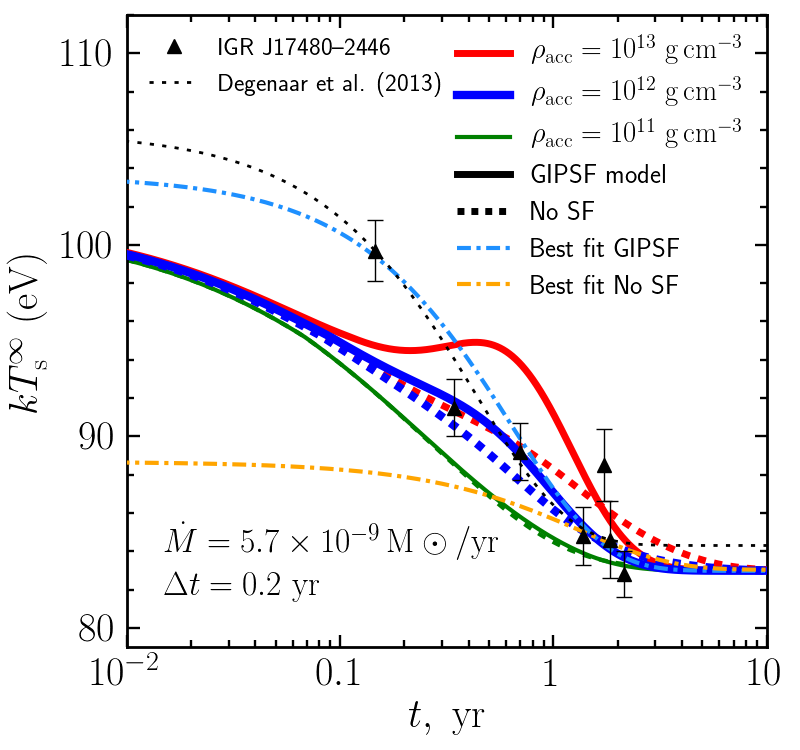

20.6395833052 232.517479008 82.9782463352
[  1.02970309e+00   4.28834379e+00   4.06807984e-03]
5.64052402879 482.110994191 83.0323707387
[  1.35560101e+00   6.68690034e+01   2.28914545e-02]


In [14]:
T_IGR = np.array([99.7, 91.5, 89.2, 84.8, 88.5, 84.6, 82.8])
t_IGR = np.array([55609, 55680.5, 55810.5, 56060, 56187.5, 56228, 56340]) - 55556
err_IGR = np.array([1.6, 1.5, 1.5, 1.5, 1.9, 2.0, 1.2])

names = np.array(['SF0','AWP2', 'GIPSF', 'SCLBL'])
labels = np.array(['No SF','AWP2', 'GIPSF', 'SCLBL'])
order2 = np.array([1,2,3,4])
colors2 = np.array(['green','orange','red','blue'])
dashes2 = np.array([[2,1e-15],[7,1],[3,2],[1.5,3]])
line_thickness2 = np.array([1.5,3,2.5,3])*2

plot2()

<IPython.core.display.Javascript object>


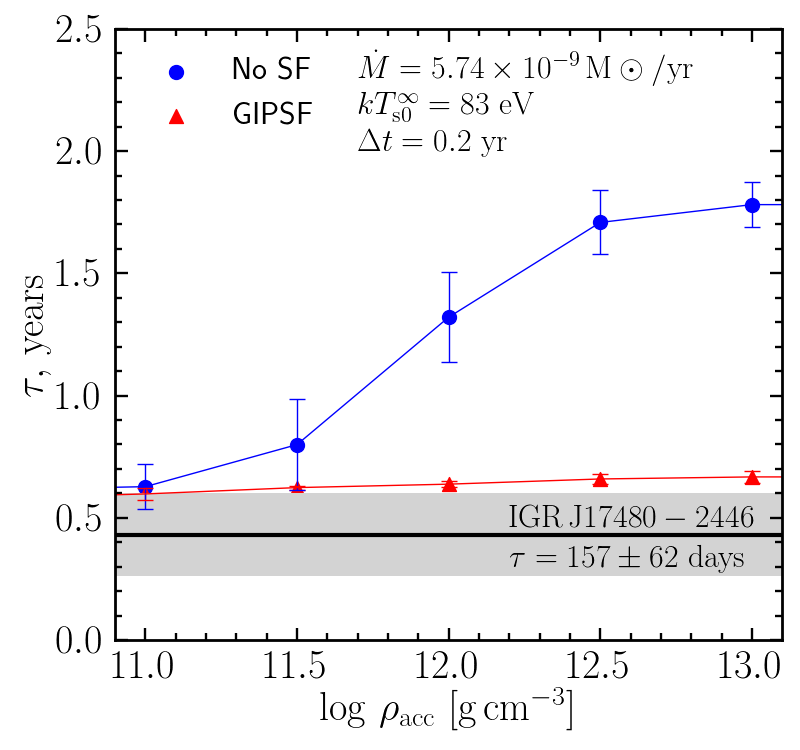

In [39]:
density = np.array([10,10.5,11,11.5,12,12.5,13,14])
plot_style()

plt.scatter(density,np.append(popt3[1,1::2],popt3[1,1::2][-1])/365,s=100,color='b',label='No SF')
plt.scatter(density,np.append(popt3[1,::2],popt3[1,::2][-1])/365,s=100,marker='^',color='r',label='GIPSF')

error_NO = np.sqrt(cov3[1,1,1::2])/365
error_SF = np.sqrt(cov3[1,1,::2])/365

error_NO = np.append(error_NO,error_NO[-1])
error_SF = np.append(error_SF,error_SF[-1])
 
plt.errorbar(density , np.append(popt3[1,::2],popt3[1,::2][-1])/365, yerr=error_SF,color='red')
plt.errorbar(density , np.append(popt3[1,1::2],popt3[1,1::2][-1])/365, yerr=error_NO,color='blue')

plt.yticks([0,0.5,1,1.5,2,2.5],fontsize=29)
plt.xticks([10,10.5,11,11.5,12,12.5,13],fontsize=29)

plt.plt.fill_between([10,12,14], np.array([95,95,95])/365, np.array([219,219,219])/365, facecolor='lightgray', interpolate=True, alpha=1)
plt.axhline(y=157/365,linewidth=3, color = 'k')

plt.text(12.2,0.47,'$\\rm IGR\\thinspace J17480-2446$',fontsize=23)
plt.text(12.2,0.3,'$\\rm \\tau = 157 \pm 62 \\thinspace \\thinspace days$',fontsize=23)

plt.text(11.7,2.3,'$\dot{M} = 5.74\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=23)
plt.text(11.7,2.12,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=23)
plt.text(11.7,2.0,'$\Delta t = 0.2 \\thinspace \\thinspace \\rm yr$',fontsize=23)
    
plt.xlim(10.9,13.1)
plt.ylim(0,2.5)

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=29)
plt.ylabel('$\\tau,$ $\\rm years$',fontsize=29)

plt.legend(loc='upper left',fontsize=23,frameon=False)

plt.savefig('IGR.eps',format='eps')

<IPython.core.display.Javascript object>


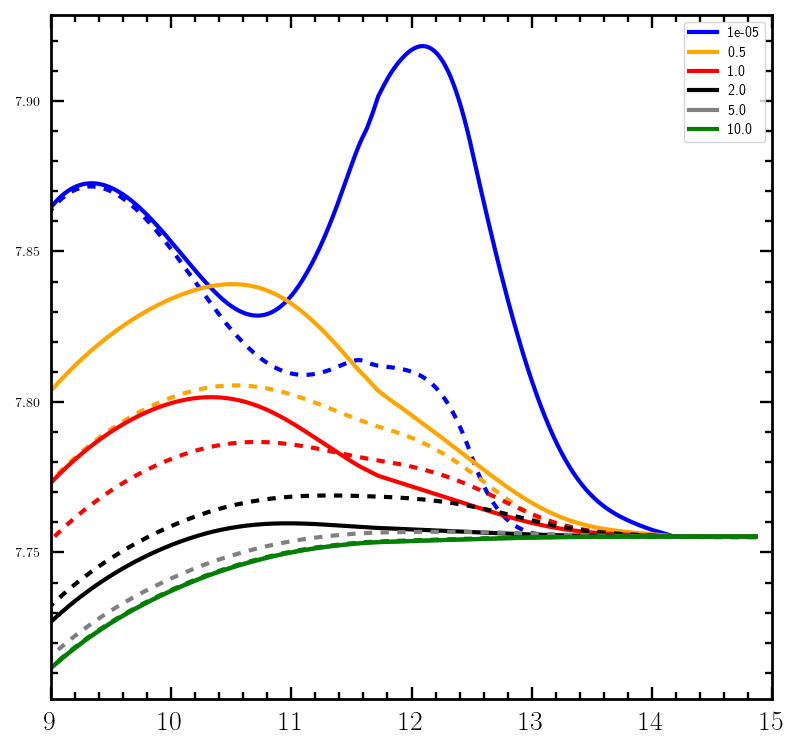

In [57]:
turn_on_time = 0

t_points_save_data  = np.array([turn_on_time + 0.00001, turn_on_time + 0.01, turn_on_time + 0.1, turn_on_time + 0.5, turn_on_time + 1., turn_on_time + 1.5,
                                       turn_on_time + 2.,   turn_on_time + 2.5,  turn_on_time + 3,  turn_on_time + 3.5, turn_on_time + 4., turn_on_time + 4.5, turn_on_time + 5,
                                       turn_on_time + 6, turn_on_time + 7, turn_on_time + 8, turn_on_time + 9, turn_on_time + 10, turn_on_time + 11,
                                       turn_on_time + 12, turn_on_time + 13, turn_on_time + 14, turn_on_time + 15, turn_on_time + 16, turn_on_time + 17,
                                       turn_on_time + 18, turn_on_time + 19, turn_on_time + 20, turn_on_time + 21, turn_on_time + 22, turn_on_time + 23,
                                       turn_on_time + 24, turn_on_time + 25, turn_on_time + 26, turn_on_time + 27, turn_on_time + 28, turn_on_time + 29])

def plot4(): 
    
    plot_style()
    k_b = 8.617330350e-5

    num = 1
    data1 = np.loadtxt('output/temperature_GIPSF_' + str(num+39) + '.dat')
    data2 = np.loadtxt('output/temperature_SF0_' + str(num+39) + '.dat')
        
    
    for i,col in zip([1,4,5,7,13,18],['blue','orange','red','black','gray','green','yellow','darkred','brown','darkblue']):

        plt.plot(np.log10(data1[:,0]),np.log10(data1[:,i]),'-',color=col,lw=3,label=str(t_points_save_data[i-1]))
        plt.plot(np.log10(data2[:,0]),np.log10(data2[:,i]),'--',color=col,lw=3)

    plt.xticks([9,10,11,12,13,14,15], fontsize=20)

    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    plt.xlim(9,15)
    plt.legend(loc='upper right')
    plt.show()

plot4()

<IPython.core.display.Javascript object>


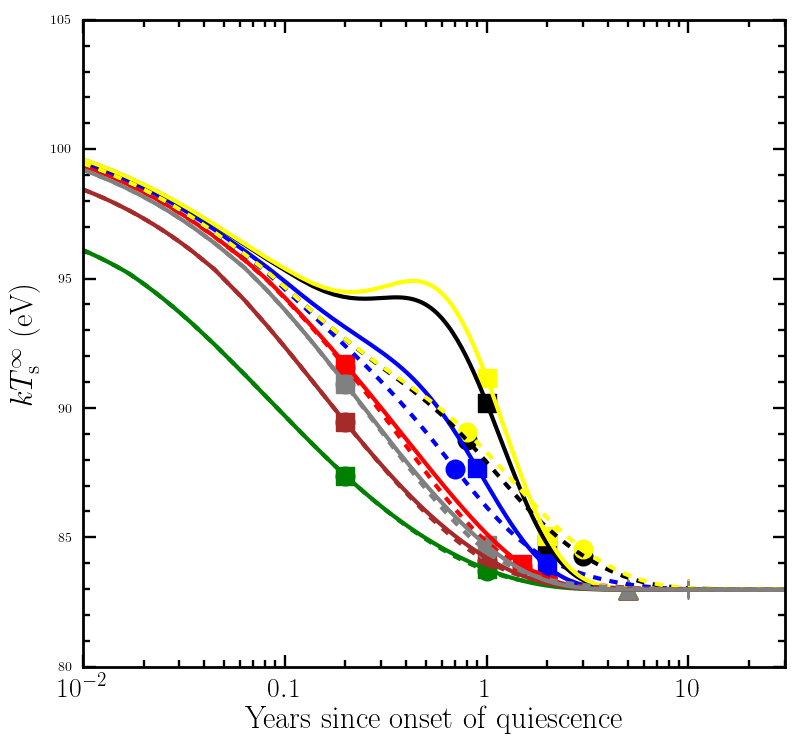

/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [58]:
def plot8(): 
    
    plot_style()
    k_b = 8.617330350e-5
    config = np.loadtxt('data/config.dat')
        
    for num,cl in zip([3,4,5,6,0,1,2],['red','blue','black','yellow','green','brown','grey']):
 
        data1 = np.loadtxt('output/cooling_GIPSF_' + str(num+35) + '.dat')[::15,:]
        data2 = np.loadtxt('output/cooling_SF0_' + str(num+35) + '.dat')[::15,:]
        
        value_SF_left = np.interp(left_SF3[num],data1[1:, 1]-1.000200e3,data1[1:, 0]*k_b)
        value_SF_right = np.interp(right_SF3[num],data1[1:, 1]-1.000200e3,data1[1:, 0]*k_b)
        value_NO_left = np.interp(left_NO3[num],data2[1:, 1]-1.000200e3,data2[1:, 0]*k_b)
        value_NO_right = np.interp(right_NO3[num],data2[1:, 1]-1.000200e3,data2[1:, 0]*k_b)
        
        value_SF_end = np.interp(5,data1[1:, 1]-1.000200e3,data1[1:, 0]*k_b)
        value_NO_end = np.interp(10,data2[1:, 1]-1.000200e3,data2[1:, 0]*k_b)
        
        plt.plot(data1[1:, 1]-1.000200e3, data1[1:, 0]*k_b,'-',color=cl,
             linewidth='3')
        plt.plot(data2[1:, 1]-1.000200e3, data2[1:, 0]*k_b, '--',color=cl,
             linewidth='3')
        plt.scatter([left_SF3[num],right_SF3[num]],[value_SF_left ,value_SF_right],color=cl,s=180,marker='s')
        plt.scatter([left_NO3[num],right_NO3[num]],[value_NO_left ,value_NO_right],color=cl,s=180)
        
        plt.scatter(5, value_SF_end,color=cl,s=180,marker='^')
        plt.scatter(10, value_NO_end,color=cl,s=180,marker='+')
        
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1,10,100,1000,10000], fontsize=20)

    plt.xlabel('$\\rm Years \\thinspace  \\thinspace  since  \\thinspace  \\thinspace  '
               'onset \\thinspace  \\thinspace  of  \\thinspace  \\thinspace quiescence$',fontsize=22)
    plt.ylabel('$kT^{\infty}_{\\rm s}$ $\\rm (eV)$',fontsize=22)
    plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
    fixlogax(plt.gca(), a='x')
    plt.xlim(0.01,30.1)
    plt.ylim(80,105)
    plt.show()

plot8()

<IPython.core.display.Javascript object>


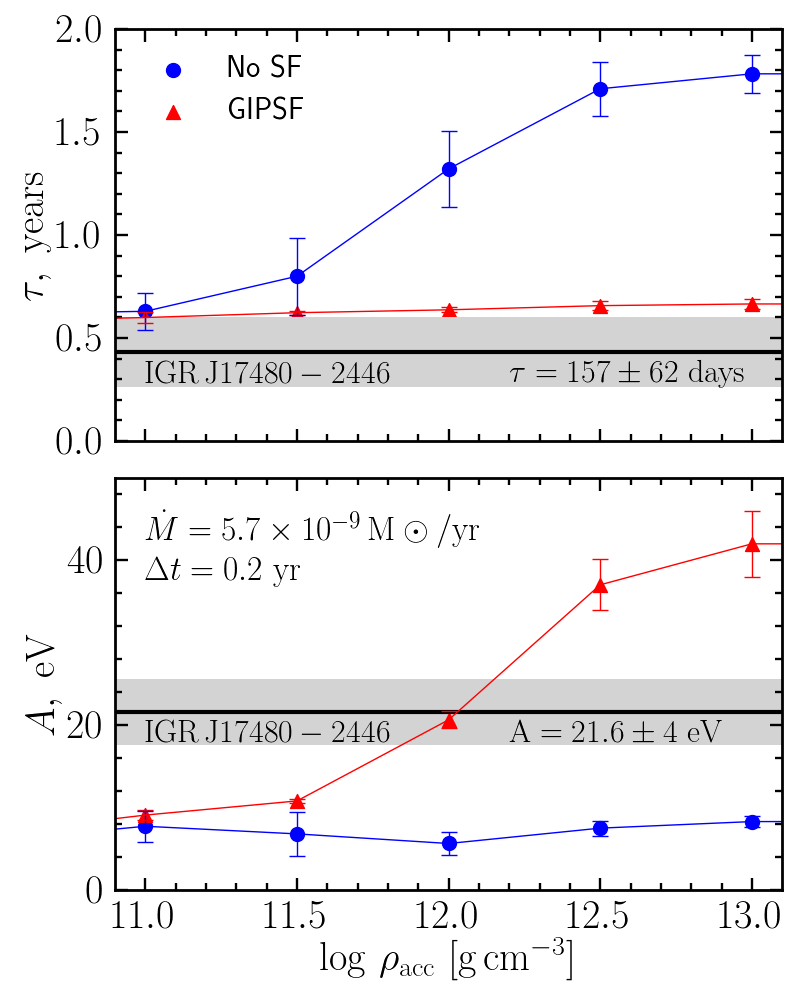

In [17]:
density = np.array([10,10.5,11,11.5,12,12.5,13,14])
plot_style(a=8,b=10)

x_minor_locator = AutoMinorLocator(5)
y_minor_locator = AutoMinorLocator(5)
x_minor_locator2 = AutoMinorLocator(5)
y_minor_locator2 = AutoMinorLocator(5)

ax1 = plt.subplot(211)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.tick_params(which='both', width=1.7)
plt.tick_params(which='major', length=9)
plt.tick_params(which='minor', length=5)

ax1.xaxis.set_minor_locator(x_minor_locator)
ax1.yaxis.set_minor_locator(y_minor_locator)
ax1.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

plt.scatter(density,np.append(popt3[1,1::2],popt3[1,1::2][-1])/365,s=100,color='b',label='No SF')
plt.scatter(density,np.append(popt3[1,::2],popt3[1,::2][-1])/365,s=100,marker='^',color='r',label='GIPSF')

error_NO = np.sqrt(cov3[1,1,1::2])/365
error_SF = np.sqrt(cov3[1,1,::2])/365

error_NO = np.append(error_NO,error_NO[-1])
error_SF = np.append(error_SF,error_SF[-1])
 
plt.errorbar(density , np.append(popt3[1,::2],popt3[1,::2][-1])/365, yerr=error_SF,color='red')
plt.errorbar(density , np.append(popt3[1,1::2],popt3[1,1::2][-1])/365, yerr=error_NO,color='blue')

plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3.0],fontsize=29)
plt.xticks([10,10.5,11,11.5,12,12.5,13],fontsize=29)

plt.plt.fill_between([10,12,14], np.array([95,95,95])/365, np.array([219,219,219])/365, facecolor='lightgray', interpolate=True, alpha=1)
plt.axhline(y=157/365,linewidth=3, color = 'k')

plt.text(11.,0.29,'$\\rm IGR\\thinspace J17480-2446$',fontsize=23)
plt.text(12.2,0.29,'$\\rm \\tau = 157 \pm 62 \\thinspace \\thinspace days$',fontsize=23)
    
plt.xlim(10.9,13.1)
plt.ylim(0,2.0)
plt.ylabel('$\\tau, \\thinspace \\thinspace \\rm years$',fontsize=29)

plt.legend(loc='upper left',fontsize=22,frameon=False)


ax2 = plt.subplot(212)

plt.tick_params(which='both', width=1.7)
plt.tick_params(which='major', length=9)
plt.tick_params(which='minor', length=5)

ax2.xaxis.set_minor_locator(x_minor_locator2)
ax2.yaxis.set_minor_locator(y_minor_locator2)
ax2.tick_params(axis='both', which='both', pad=8, left='on', right='on',top='on',bottom='on')

plt.fill_between(np.array([10,12,14]), np.array([17.6, 17.6, 17.6]), np.array([25.6, 25.6, 25.6]), facecolor='lightgray', interpolate=True, alpha=1)
plt.axhline(y=21.6,linewidth=3, color = 'k')

plt.scatter(density,np.append(popt3[0,1::2],popt3[0,1::2][-1]),s=100,color='b',label='No SF')
plt.scatter(density,np.append(popt3[0,::2],popt3[0,::2][-1]),s=100,marker='^',color='r',label='GIPSF')

error_NO = np.sqrt(cov3[0,0,1::2])
error_SF = np.sqrt(cov3[0,0,::2])

error_NO = np.append(error_NO,error_NO[-1])
error_SF = np.append(error_SF,error_SF[-1])
 
plt.errorbar(density , np.append(popt3[0,::2],popt3[0,::2][-1]), yerr=error_SF,color='red')
plt.errorbar(density , np.append(popt3[0,1::2],popt3[0,1::2][-1]), yerr=error_NO,color='blue')

plt.yticks([0,20,40],fontsize=29)
plt.xticks([10,10.5,11,11.5,12,12.5,13],fontsize=29)

plt.text(11.,42.5,'$\dot{M} = 5.7\\times 10^{-9} \\thinspace \\rm M \\odot / yr$',fontsize=24)
#plt.text(11.,37,'$kT_{\\rm s 0}^{\infty} = 83 \\thinspace \\thinspace \\rm eV$',fontsize=24)
plt.text(11.,37.5,'$\Delta t = 0.2 \\thinspace \\thinspace \\rm yr$',fontsize=24)

plt.text(11.,18.2,'$\\rm IGR\\thinspace J17480-2446$',fontsize=23)
plt.text(12.2,18.2,'$\\rm A = 21.6 \pm 4 \\thinspace \\thinspace eV$',fontsize=23)

plt.xlim(10.9,13.1)
plt.ylim(0,50)

plt.xlabel('$\\rm log$ $\\rho_{\\rm acc}$ $\\rm [ g \\thinspace cm^{-3}]$',fontsize=29)
plt.ylabel('$A, \\thinspace \\thinspace \\rm eV$',fontsize=29)

plt.savefig('IGR.eps',format='eps')

<IPython.core.display.Javascript object>


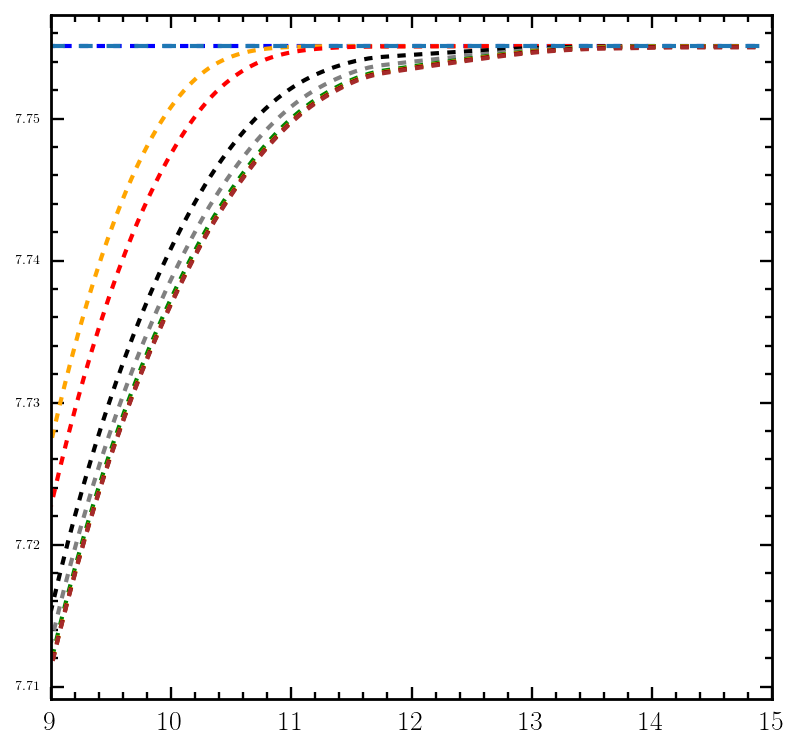

56900000.0 7.7551122664
53355830.0 7.72718188015
52809100.0 7.72270876608
51919910.0 7.71533393097
51651970.0 7.71308689011
51488730.0 7.71171217983
51448530.0 7.71137297051
51446550.0 7.71135625633
51440130.0 7.71130205747


/home/maryhallow/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [12]:
data_see = np.loadtxt('output/temperature_GIPSF_' + str(43) + '.dat')
plot_style()
k_b = 8.617330350e-5



for i,col in zip([1,3,5,8,9,11,17,22,-1],['blue','orange','red','black','gray','green','yellow','darkred','brown','darkblue']):

    plt.plot(np.log10(data_see[:,0]),np.log10(data_see[:,i]),'--',color=col,lw=3)
    print(data_see[-1,i],np.log10(data_see[-1,i]))

plt.xticks([9,10,11,12,13,14,15], fontsize=20)

plt.legend(loc='upper right',fontsize=17,scatterpoints=1,frameon=False)
plt.xlim(9,15)
plt.legend(loc='upper right')
plt.axhline(y=np.log10(0.569e8),dashes=[10,10],lw=3)
plt.show()

In [22]:
10**7.7551122664/10**7.71135625633

1.1060022489603123

In [31]:
data_tite = np.loadtxt('data/tite.dat',skiprows=3)
k_b = 8.617330350e-5
redshift = 0.8183 
T_b = 0.569e8 / 1.106
#T_b = 10**7.71130205747
T_b /= redshift

T_s = np.power(10,np.interp(np.log10(T_b),data_tite[:,0],data_tite[:,1])) * k_b * redshift
print(T_s)

83.0133550545


In [37]:
M_acc = np.array([1e-10, 2e-10, 3.e-10, 4.e-10, 5e-10, 6e-10, 7e-10, 8.e-10, 9.e-10, 1.e-9, 1.e-8, 1.e-7, 1.e-6])
table_tite = np.loadtxt('data/tite_table.dat')
T_s_eff = np.zeros(len(M_acc))
for i in range(len(M_acc)):
    T_s = np.power(10,np.interp(np.log10(T_b),table_tite[:,0],table_tite[:,1+i])) * k_b * redshift
    T_s_eff[i] = T_s
    print(T_s)
    
print(np.interp(73.6,T_s_eff,M_acc))

71.4609261774
73.4807887005
74.6390015915
75.4390442971
76.044630914
76.5265578312
76.9239918192
77.2613379332
77.5520179149
77.8062434073
81.804111352
82.9581493949
83.0133550545
2.1029269320272656e-10
